In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d kazanova/sentiment140
!unzip *.zip

 93% 75.0M/80.9M [00:00<00:00, 133MB/s]
100% 80.9M/80.9M [00:00<00:00, 143MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [5]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1")

### EDA

In [6]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
data.columns = ["label", "time", "date", "query", "username", "text"]

In [8]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
len(data)

1599999

In [10]:
data.shape

(1599999, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [12]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

In [13]:
np.sum(data.isnull().any(axis=1))

0

In [14]:
data.label.unique()

array([0, 4])

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

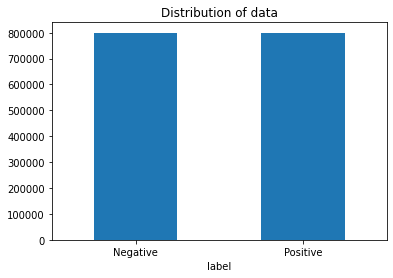

In [15]:
group = data.groupby('label').count()['text']
axis = group.plot(kind='bar', title='Distribution of data', legend=False)
axis.set_xticklabels(['Negative','Positive'], rotation = 0)

In [16]:
data=data[['text','label']]

In [17]:
data.head()

,text,label
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [18]:
data['label'][data['label']==4]=1

In [19]:
data.label.unique()

array([0, 1])

In [20]:
data['text']=data['text'].str.lower()

In [21]:
data['text'].tail()

1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

### Since Dataset is Large, Taking 1/4th of Dataset

In [ ]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
data = pd.concat([data_pos, data_neg])

In [22]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [23]:
data

,text,label
0,is upset that he can't update his facebook by ...,0
1,@kenichan i dived many times for the ball. man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@kwesidei not the whole crew,0
...,...,...
1599994,just woke up. having no school is the best fee...,1
1599995,thewdb.com - very cool to hear old walt interv...,1
1599996,are you ready for your mojo makeover? ask me f...,1
1599997,happy 38th birthday to my boo of alll time!!! ...,1


### Removing Punctuations

In [24]:
import string

In [25]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [26]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

1599994    just woke up having no school is the best feel...
1599995    thewdbcom  very cool to hear old walt intervie...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

### Removing repeating characters

In [27]:
import re

In [28]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [29]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

1599994    just woke up having no schol is the best felin...
1599995    thewdbcom very col to hear old walt interviews...
1599996    are you ready for your mojo makeover ask me fo...
1599997    hapy 38th birthday to my bo of al time tupac a...
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

### Removing Emails

In [30]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [31]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

1599994    just woke up having no schol is the best felin...
1599995    thewdbcom very col to hear old walt interviews...
1599996    are you ready for your mojo makeover ask me fo...
1599997    hapy 38th birthday to my bo of al time tupac a...
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

### Removing URL's

In [32]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [33]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

1599994    just woke up having no schol is the best felin...
1599995    thewdbcom very col to hear old walt interviews...
1599996    are you ready for your mojo makeover ask me fo...
1599997    hapy 38th birthday to my bo of al time tupac a...
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

### Removing Numbers

In [34]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [35]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

1599994    just woke up having no schol is the best felin...
1599995    thewdbcom very col to hear old walt interviews...
1599996    are you ready for your mojo makeover ask me fo...
1599997    hapy th birthday to my bo of al time tupac ama...
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

### Remove Emojis

In [36]:
def de_emojify(text):
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)
    return regex_pattern.sub(r'', text)

In [37]:
data['text'] = data['text'].apply(lambda x: de_emojify(x))
data['text'].tail()

1599994    just woke up having no schol is the best felin...
1599995    thewdbcom very col to hear old walt interviews...
1599996    are you ready for your mojo makeover ask me fo...
1599997    hapy th birthday to my bo of al time tupac ama...
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

### Wordcloud

In [38]:
from wordcloud import WordCloud

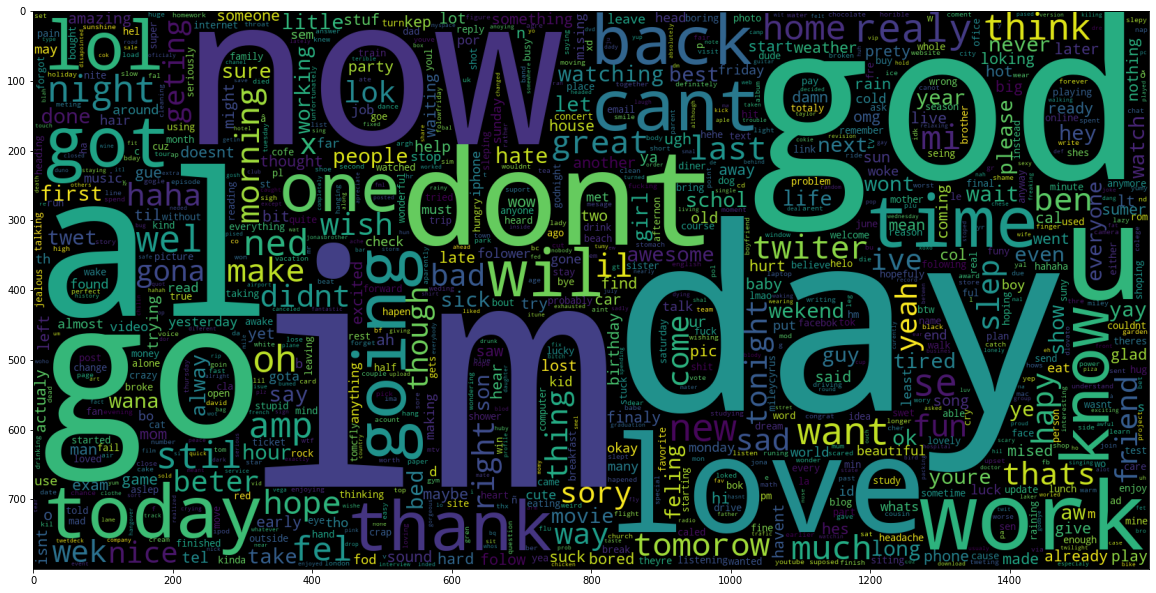

In [39]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(data["text"]))
plt.imshow(wc)

### Stopwords Removal

In [42]:
cachedStopWords = cachedStopWords = stopwords.words("english")
def swr_tokenize(text):
  text = ' '.join([word for word in text.split() if word not in cachedStopWords])
  return text

In [43]:
%%time
from tqdm import tqdm
tqdm.pandas()
data['text'] = data['text'].progress_apply(lambda x: swr_tokenize(x))
data['text'].tail()

100%|██████████| 1599999/1599999 [00:51<00:00, 31244.37it/s]

CPU times: user 51.4 s, sys: 371 ms, total: 51.8 s
Wall time: 51.3 s


1599994                          woke schol best feling ever
1599995    thewdbcom col hear old walt interviews â« htp...
1599996                      ready mojo makeover ask details
1599997       hapy th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

### WordCloud After Stopword Removal

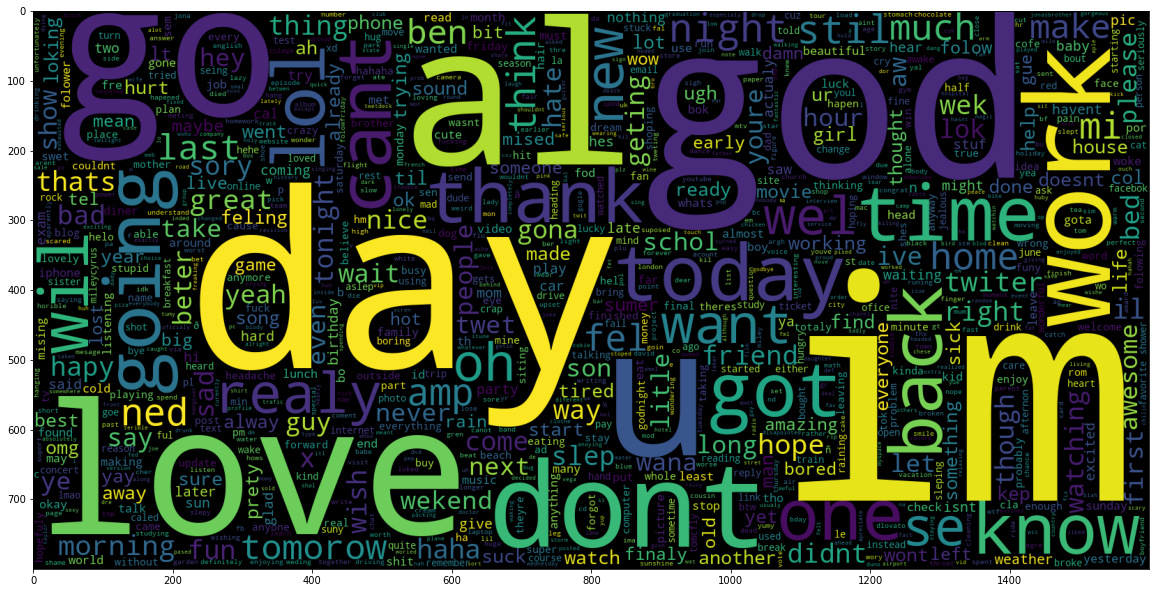

In [44]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(data["text"]))
plt.imshow(wc)

### Split Dataset for Different Operations

In [45]:
data_tok=data
data_tfidf=data

### Tokenization

In [46]:
tokenizer = RegexpTokenizer(r'\w+')
data_tok['text'] = data_tok['text'].progress_apply(tokenizer.tokenize)

100%|██████████| 1599999/1599999 [00:07<00:00, 205174.53it/s]


In [47]:
data_tok.tail()

,text,label
1599994,"[woke, schol, best, feling, ever]",1
1599995,"[thewdbcom, col, hear, old, walt, interviews, ...",1
1599996,"[ready, mojo, makeover, ask, details]",1
1599997,"[hapy, th, birthday, bo, al, time, tupac, amar...",1
1599998,"[hapy, charitytuesday, thenspc, sparkscharity,...",1


### Stemming

In [48]:
import nltk

In [49]:
%%time
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data_tok['text']= data_tok['text'].progress_apply(lambda x: stemming_on_text(x))

100%|██████████| 1599999/1599999 [04:25<00:00, 6032.11it/s]


CPU times: user 4min 26s, sys: 1.98 s, total: 4min 28s
Wall time: 4min 25s


In [50]:
data_tok['text'].head()

0    [upset, cant, update, facebok, texting, might,...
1    [kenichan, dived, many, times, bal, managed, s...
2               [whole, body, fels, itchy, like, fire]
3    [nationwideclas, behaving, al, im, mad, cant, ...
4                              [kwesidei, whole, crew]
Name: text, dtype: object

### Lemmatization

In [51]:
%%time
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data_tok['text'] = data_tok['text'].progress_apply(lambda x: lemmatizer_on_text(x))

100%|██████████| 1599999/1599999 [00:53<00:00, 29857.95it/s]


CPU times: user 53.8 s, sys: 408 ms, total: 54.2 s
Wall time: 53.7 s


In [54]:
data_tok['text'].head()

0    [upset, cant, update, facebok, texting, might,...
1    [kenichan, dived, many, times, bal, managed, s...
2               [whole, body, fels, itchy, like, fire]
3    [nationwideclas, behaving, al, im, mad, cant, ...
4                              [kwesidei, whole, crew]
Name: text, dtype: object

### Seperating Input Features and Label

In [55]:
X=data_tok.text
y=data_tok.label

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [57]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [58]:
sequences_matrix.shape

(1599999, 500)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=1)

In [61]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

### Simple Neural Network Model with LSTM

In [70]:
model = Sequential(
    [
        Input(name='inputs',shape=[max_len]),
        Embedding(2000,50,input_length=max_len),
        LSTM(64),
        Dense(256,activation='relu'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')        
    ]
)

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 50)           100000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
history=model.fit(X_train,Y_train,batch_size=1024,epochs=2, validation_split=0.1)

Epoch 1/2
1125/1125 [==============================] - 2278s 2s/step - loss: 0.4943 - accuracy: 0.7582 - val_loss: 0.4773 - val_accuracy: 0.7687
Epoch 2/2
1125/1125 [==============================] - 2128s 2s/step - loss: 0.4746 - accuracy: 0.7706 - val_loss: 0.4699 - val_accuracy: 0.7727


In [74]:
accr1 = model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 788s 79ms/step - loss: 0.4681 - accuracy: 0.7740


In [75]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1]))

Test set
  Accuracy: 0.77


In [76]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

In [77]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_test, y_pred)

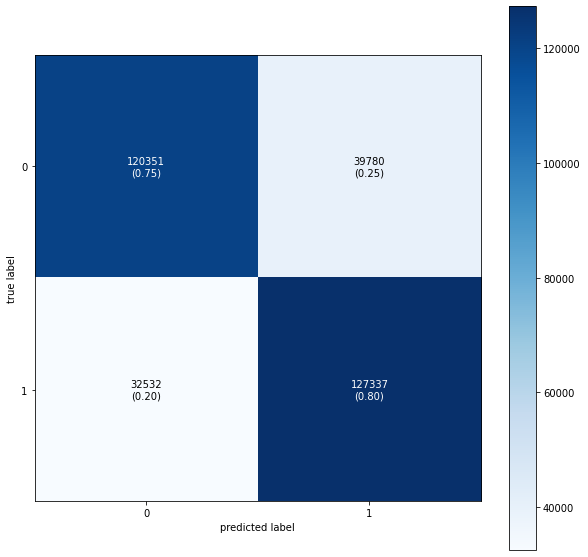

In [78]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

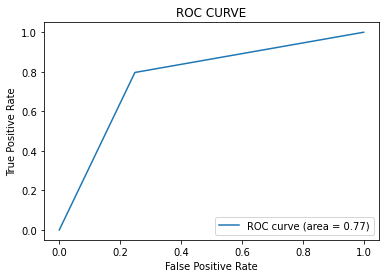

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### MLP Classifier

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)

In [82]:
preds_mlp=clf.predict(X_test)

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(Y_test, preds_mlp))

              precision    recall  f1-score   support

           0       0.52      0.77      0.62    160131
           1       0.55      0.28      0.37    159869

    accuracy                           0.52    320000
   macro avg       0.53      0.52      0.50    320000
weighted avg       0.53      0.52      0.50    320000



In [85]:
conf_mat_mlp=confusion_matrix(Y_test, preds_mlp)

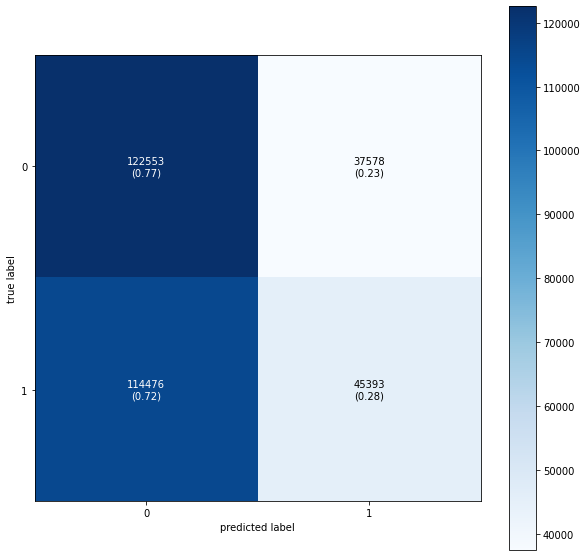

In [86]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_mlp,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Linear SVC

In [87]:
from sklearn.svm import LinearSVC

In [88]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
y_pred_svc = SVCmodel.predict(X_test)
print(classification_report(Y_test, y_pred_svc))
cf_matrix = confusion_matrix(Y_test, y_pred_svc)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

              precision    recall  f1-score   support

           0       0.51      0.53      0.52    160131
           1       0.51      0.49      0.50    159869

    accuracy                           0.51    320000
   macro avg       0.51      0.51      0.51    320000
weighted avg       0.51      0.51      0.51    320000



Text(0.5, 1.0, 'Confusion Matrix')

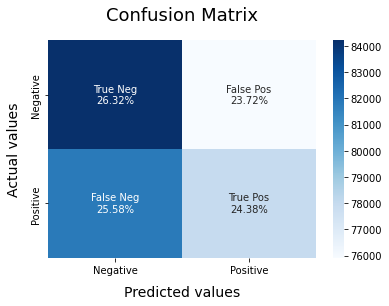

In [89]:
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### SGDClassifier

In [90]:
from sklearn.linear_model import SGDClassifier

In [91]:
sgdmodel = SGDClassifier(max_iter=1000, tol=1e-3,verbose=True).fit(X_train,Y_train)

In [92]:
y_pred_sgd = sgdmodel.predict(X_test)

In [93]:
print(classification_report(Y_test, y_pred_sgd))
cf_matrix = confusion_matrix(Y_test, y_pred_sgd)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

              precision    recall  f1-score   support

           0       0.50      0.80      0.61    160131
           1       0.49      0.19      0.27    159869

    accuracy                           0.50    320000
   macro avg       0.49      0.50      0.44    320000
weighted avg       0.49      0.50      0.44    320000



Text(0.5, 1.0, 'Confusion Matrix')

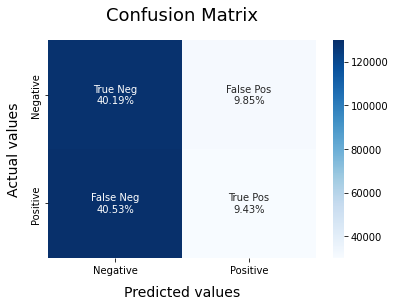

In [94]:
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## TF-IDF Vectorization

In [95]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data_tfidf['text']= data_tfidf['text'].progress_apply(lambda x: stemming_on_text(x))

100%|██████████| 1599999/1599999 [04:25<00:00, 6021.24it/s]


In [97]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data_tfidf['text'] = data_tfidf['text'].progress_apply(lambda x: lemmatizer_on_text(x))
data_tfidf['text'].tail()

100%|██████████| 1599999/1599999 [00:50<00:00, 31942.46it/s]


1599994                    [woke, schol, best, feling, ever]
1599995    [thewdbcom, col, hear, old, walt, interviews, ...
1599996                [ready, mojo, makeover, ask, details]
1599997    [hapy, th, birthday, bo, al, time, tupac, amar...
1599998    [hapy, charitytuesday, thenspc, sparkscharity,...
Name: text, dtype: object

In [98]:
def make_Sentence(text):
  text=' '.join(text)
  return text
data_tfidf['text'] = data_tfidf['text'].progress_apply(lambda x: make_Sentence(x))
data_tfidf['text'].tail()

100%|██████████| 1599999/1599999 [00:02<00:00, 675876.88it/s]


1599994                          woke schol best feling ever
1599995    thewdbcom col hear old walt interviews â htpbl...
1599996                      ready mojo makeover ask details
1599997       hapy th birthday bo al time tupac amaru shakur
1599998    hapy charitytuesday thenspc sparkscharity spea...
Name: text, dtype: object

In [99]:
X=list(data_tfidf.text)
y=list(data_tfidf.label)

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words = cachedStopWords, strip_accents = 'unicode', max_features = 500000)
X_train = vectorizer.fit_transform(X_train).astype('float16')
X_test  = vectorizer.transform(X_test).astype('float16')
print('No. of feature_words: ', len(vectorizer.get_feature_names()))

No. of feature_words:  500000


### MLPClassifier

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    160131
           1       0.78      0.80      0.79    159869

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



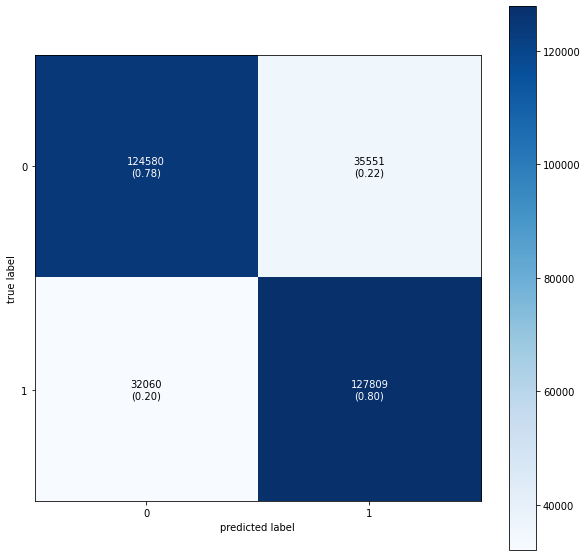

In [114]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
preds_mlp=clf.predict(X_test)
print(classification_report(Y_test, preds_mlp))
conf_mat_mlp=confusion_matrix(Y_test, preds_mlp)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_mlp,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Linear SVC

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    160131
           1       0.78      0.80      0.79    159869

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



Text(0.5, 1.0, 'Confusion Matrix')

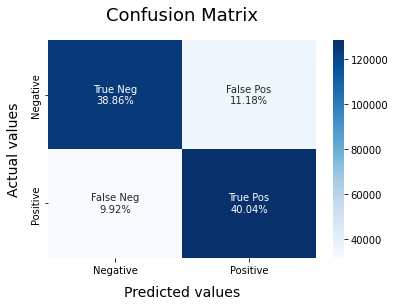

In [115]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, Y_train)
y_pred_svc = SVCmodel.predict(X_test)
print(classification_report(Y_test, y_pred_svc))
cf_matrix = confusion_matrix(Y_test, y_pred_svc)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### SGD Classifier

-- Epoch 1
Norm: 40.90, NNZs: 496151, Bias: 0.306918, T: 1279999, Avg. loss: 0.600812
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 40.86, NNZs: 496586, Bias: 0.297843, T: 2559998, Avg. loss: 0.595328
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 40.85, NNZs: 496655, Bias: 0.290987, T: 3839997, Avg. loss: 0.594714
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 40.84, NNZs: 496676, Bias: 0.296683, T: 5119996, Avg. loss: 0.594408
Total training time: 1.86 seconds.
-- Epoch 5
Norm: 40.84, NNZs: 496689, Bias: 0.296863, T: 6399995, Avg. loss: 0.594233
Total training time: 2.31 seconds.
-- Epoch 6
Norm: 40.84, NNZs: 496695, Bias: 0.298067, T: 7679994, Avg. loss: 0.594085
Total training time: 2.76 seconds.
-- Epoch 7
Norm: 40.84, NNZs: 496695, Bias: 0.298208, T: 8959993, Avg. loss: 0.594039
Total training time: 3.21 seconds.
Convergence after 7 epochs took 3.22 seconds
              precision    recall  f1-score   support

           0       0.80      0.71      0.75    160131

Text(0.5, 1.0, 'Confusion Matrix')

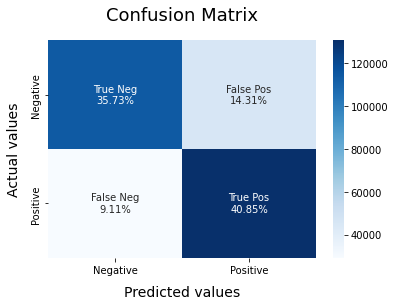

In [116]:
sgdmodel = SGDClassifier(max_iter=1000, tol=1e-3,verbose=True).fit(X_train,Y_train)
y_pred_sgd = sgdmodel.predict(X_test)
print(classification_report(Y_test, y_pred_sgd))
cf_matrix = confusion_matrix(Y_test, y_pred_sgd)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### **Accuracy Metrics**

<table>
<tr>
  <th>Algorithm</th>
  <th>Tokenization</th>
  <th>TF-IDF</th>
</tr>
<tr>
  <th>Neural Network</th>
  <td>77%</td>
  <td>N/A</td>
</tr>
<tr>
  <th>MLP Classifier</th>
  <td>52%</td>
  <td>79%</td>
</tr>
<tr>
  <th>Linear SVC</th>
  <td>51%</td>
  <td>79%</td>
</tr>
<tr>
  <th>SGD Classifier</th>
  <td>50%</td>
  <td>77%</td>
</tr>
</table>


* Thus when using Tokenization, The Neural Network 
Model Gives the best Performance.
* When using TF-IDF, MLP Classifier gives the best Performance.

**Thus using TF-IDF, the model performance and accuracy increases substantially**